# Correlating like a data master:

## Required setup:

In [1]:
# Import all required libraries
# Data analysis and manipulation
import pandas as pd
# Working with arrays
import numpy as np
# Statistical visualization
import seaborn as sns
# Matlab plotting for Python
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Data analysis
import statistics as stat
import scipy.stats as stats
# Two-sample Chi-Square test
from scipy.stats import chi2_contingency
# Predictive data analysis: process data 
from sklearn import preprocessing as pproc
# Predictive data analysis: linear models
from sklearn.model_selection import cross_val_predict
# Predictive data analysis: linear models
from sklearn.linear_model import LinearRegression
# Visualizing missing values
import missingno as msno
# Statistical modeling
import statsmodels.api as sm
# Statistical modeling: ANOVA
from statsmodels.formula.api import ols
# Mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 1.5, rc = {'figure.figsize':(8, 8)})

# Change theme to "white"
sns.set_style("white")

## Loading the examine a dataset:

In [2]:
# Read csv 
data = pd.read_csv("Data/Data/Figure 2/Data_Fig2_Repo.csv")

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# What does the data look like
data.head()

,Date,Group,SF,Normalized_TWF,pLWP,mLWP
0,2019-10-04,Drought-sensitive canopy,184.040975,82.243292,-0.263378,-0.679769
1,2019-10-04,Drought-sensitive understory,2.475989,1.258050,-0.299669,-0.761326
2,2019-10-04,Drought-tolerant canopy,10.598949,4.405479,-0.437556,-0.722557
3,2019-10-04,Drought-tolerant understory,4.399854,2.055276,-0.205224,-0.702858
4,2019-10-05,Drought-sensitive canopy,182.905444,95.865255,-0.276928,-0.708261


## Describe and visualize correlations:

Correlations are a statistical relationship between two numerical variables, may or may not be causal. Exploring correlations in your data allows you determine data independence, a major assumption of parametric statistics, which means your variables are both randomly collected.

In [3]:
# subset dataframe to include only numeric columns
numData = data.select_dtypes(include='number')

# Table of correlations between numerical variables (we are sticking to the default Pearson's r coefficient)
numData.corr()

,SF,Normalized_TWF,pLWP,mLWP
SF,1.000000,0.988137,0.120281,-0.201195
Normalized_TWF,0.988137,1.000000,0.125645,-0.189330
pLWP,0.120281,0.125645,1.000000,0.677651
mLWP,-0.201195,-0.189330,0.677651,1.000000


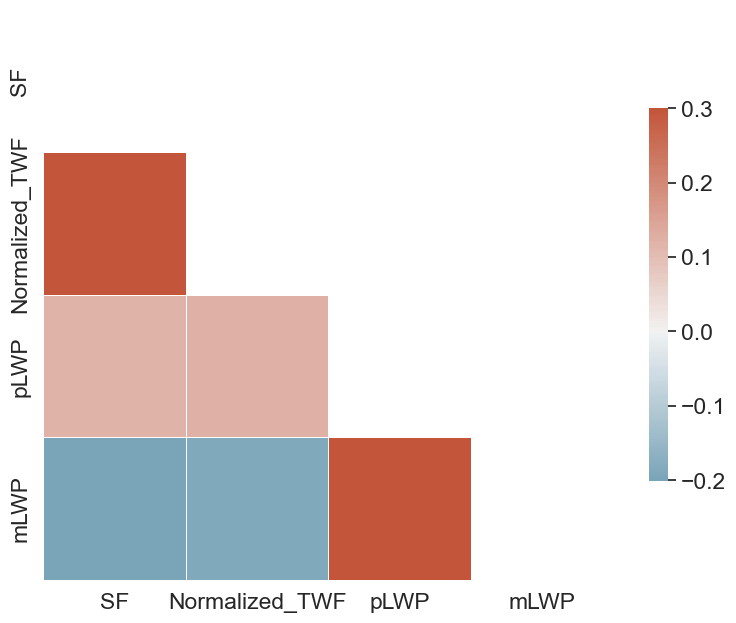

In [4]:
# Heatmap correlation matrix of numerical variables
# Correlation matrix
corr = numData.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap = True)

# Heatmap of the correlation matrix
sns.heatmap(corr, cmap = cmap, mask = mask, vmax = 0.3, center = 0,
            square = True, linewidths = 0.5, cbar_kws = {"shrink": .5})
            
# Tight margins for plot
plt.tight_layout()

# Show plot
plt.show()

## Visualize correlation within groups:

If we have groups that we will compare later on, it is a good idea to see how each numerical variable correlates within these groups.

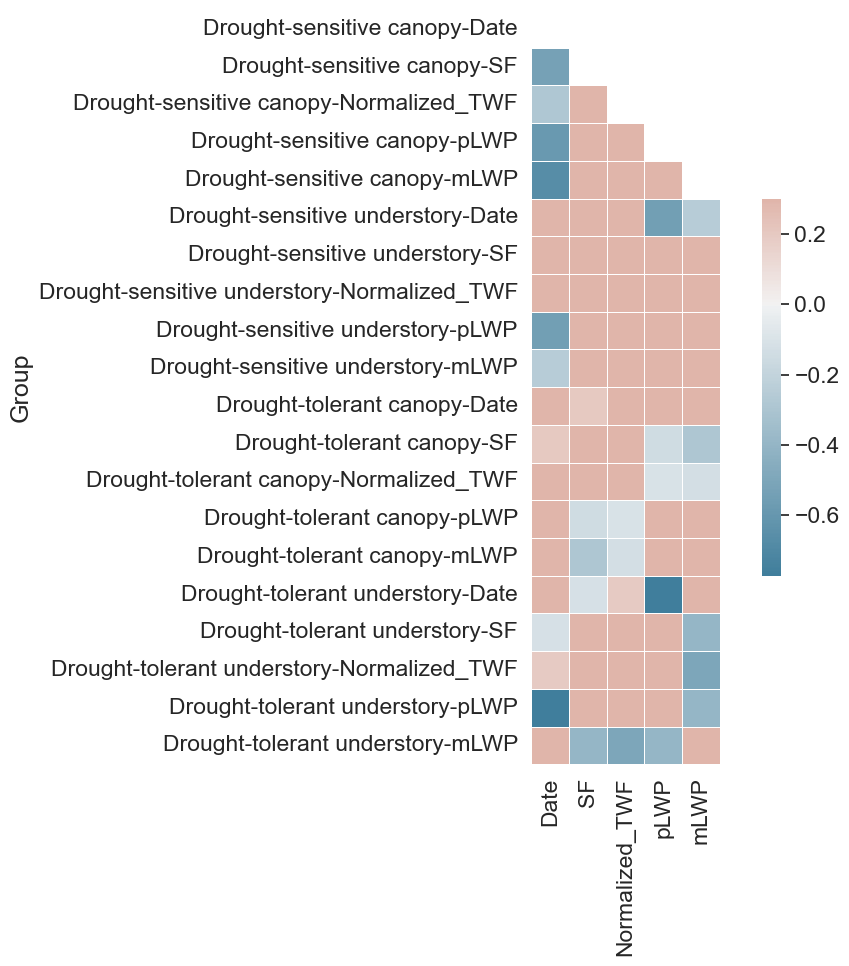

In [5]:
# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 1.5, rc = {'figure.figsize':(10, 10)})

# Change theme to "white"
sns.set_style("white")

# Heatmap correlation matrix of numerical variables
# Correlation matrix
corr = data.groupby('Group').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap = True)

# Heatmap of the correlation matrix
ax = sns.heatmap(corr, cmap = cmap, mask = mask, vmax = 0.3, center = 0,
            square = True, linewidths = 0.5, cbar_kws = {"shrink": .5})
            
# Change y-axis label
ax.set(ylabel = 'Group')

# Tight margins for plot
plt.tight_layout()

# Show plot
plt.show()

This is great, we have our correlations within groups! However, the correlation matrices aren’t always the most intuitive, so let’s plot!

Specifically, we are looking at the correlations between predawn leaf water potential pLWP and midday leaf water potential mLWP. Leaf water potential is a key indicator for how stressed plants are in droughts.

C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

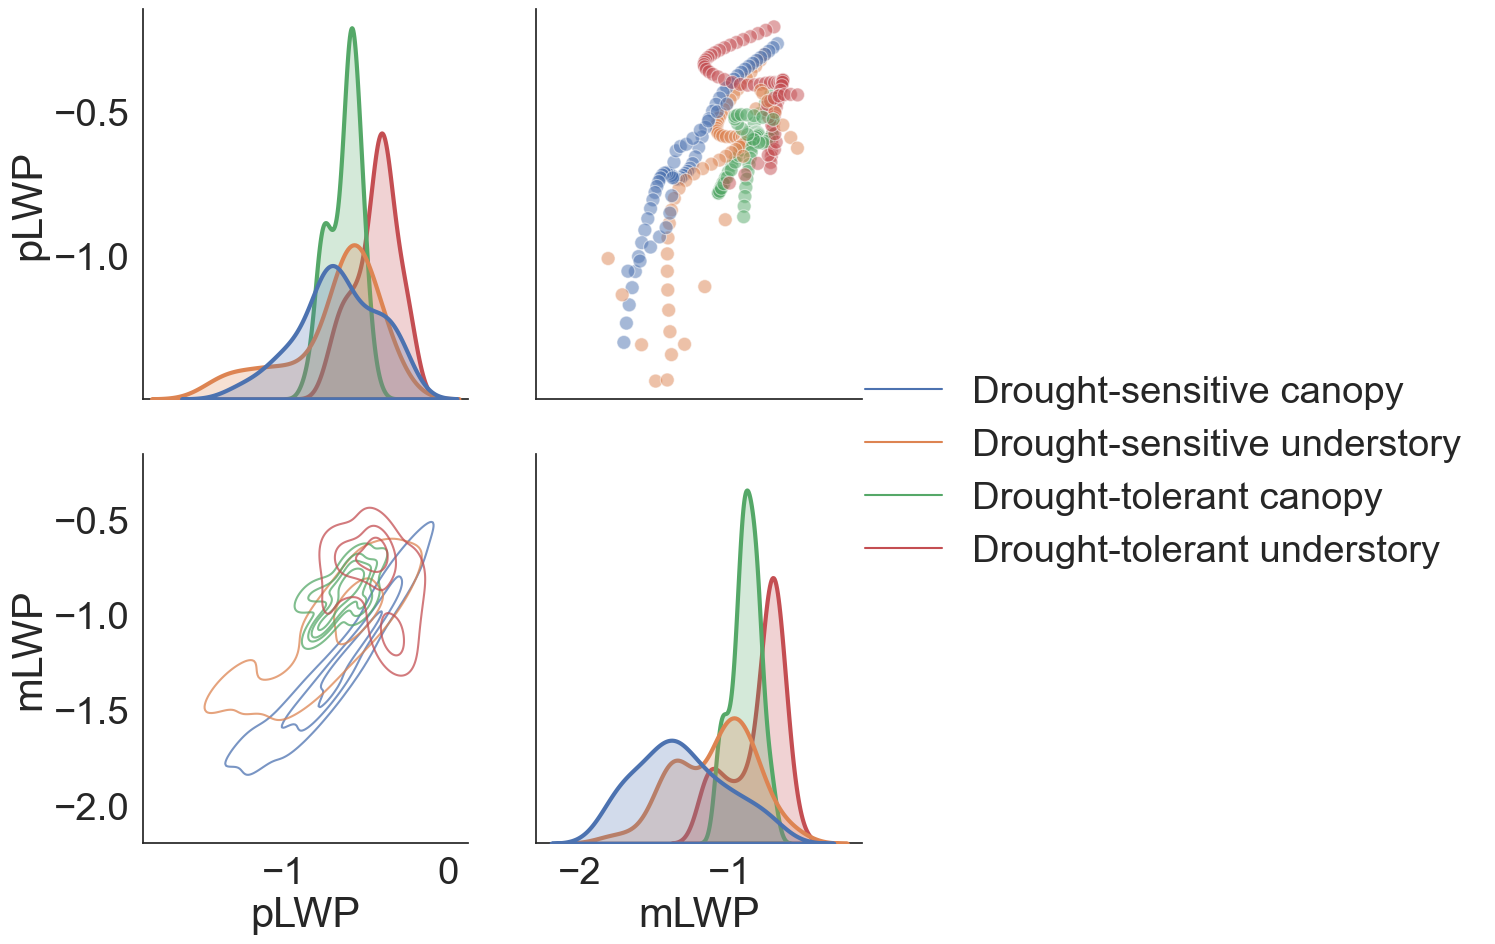

In [6]:
dataplot = data[["Group", "pLWP", "mLWP"]]

# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 2.5, rc = {'figure.figsize':(10, 10)})

# Change seaborn plot theme to white
sns.set_style("white")

# Empty subplot grid for pairwise relationships
g = sns.PairGrid(dataplot, hue = "Group", height = 5)

# Add scatterplots to the upper portion of the grid
g1 = g.map_upper(sns.scatterplot, alpha = 0.5, s = 100)

# Add a kernal density plot to the diagonal of the grid
g2 = g1.map_diag(sns.kdeplot, fill = True, linewidth = 3)

# Add a kernal density plot to the lower portion of the grid
g3 = g2.map_lower(sns.kdeplot, levels = 5, alpha = 0.75)

# Remove legend title
g4 = g3.add_legend(title = "", adjust_subtitles = True)

# Show plot
plt.show()

## Describe and visualize relationships based on target variables:

## Numerical Target Variables: Numerical Variable of Interest:

Target variables are essentially numerical or categorical variables that you want to relate others to in a data frame.

The relationships below will have the formula relationship target ~ predictor.

In [7]:
# The numerical predictor variable 
X = data[["mLWP"]]

# The numerical target variable
Y = data[["pLWP"]]

# Define the linear model, drop NAs
model = sm.OLS(Y, X, missing = 'drop')

# Fit the model
model_result = model.fit()

# Summary of the linear model
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   pLWP   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              3882.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):                   3.29e-164
Time:                        21:25:28   Log-Likelihood:                          102.11
No. Observations:                 276   AIC:                                     -202.2
Df Residuals:                     275   BIC:                                     -198.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mLWP           0.5995      0.010     62.309      0.000       0.581       0.618
==============================================================================
Omnibus:                        6.825   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                8.247
Skew:                          -0.219   Prob(JB):                       0.0162
Kurtosis:                       3.725   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Target variables are essentially numerical or categorical variables that you want to relate others to in a data frame.

The relationships below will have the formula relationship target ~ predictor.

## Plotting the linear relationship:

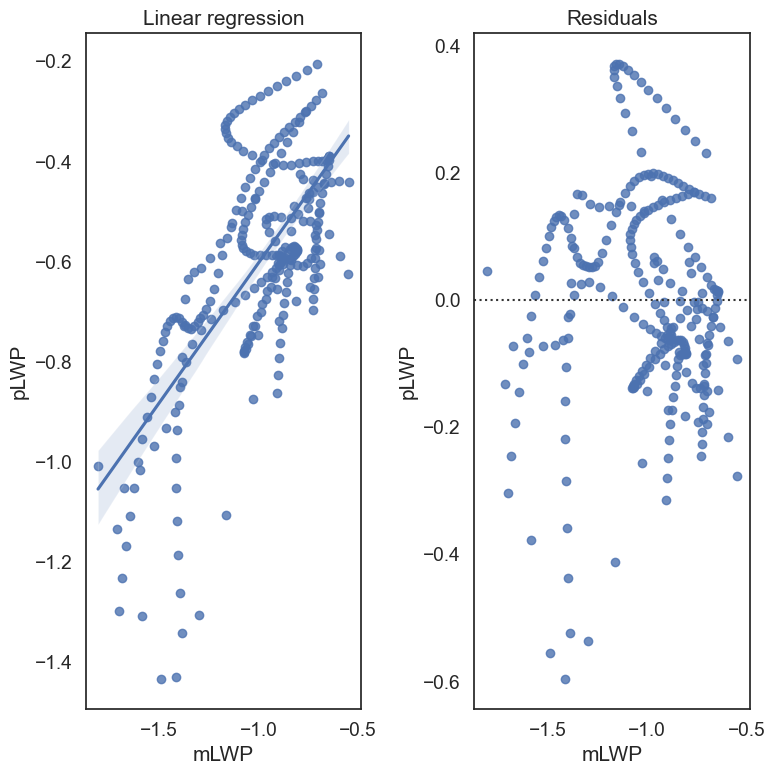

In [8]:
# Plotting the linear relationship

# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 1.25, rc = {'figure.figsize':(8, 8)})

# Change seaborn plot theme to white
sns.set_style("white")

# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Regression plot between mLWP and pLWP
sns.regplot(data = data, x = "mLWP", y = "pLWP", ax = ax1)

# Set regression plot title
ax1.set_title("Linear regression")

# Regression plot between mLWP and pLWP
sns.residplot(data = data, x = "mLWP",
              y = "pLWP", ax = ax2)
              
# Set residual plot title
ax2.set_title("Residuals")

# Tight margins
plt.tight_layout()

# Show plot
plt.show()

## Numerical Target Variables: Categorical Variable of Interest:

Formula: pLWP (numerical) ~ Group (categorical)

In [9]:
model = ols('pLWP ~ C(Group)', data = data).fit()

sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(Group),2.775293,3.0,22.045408,8.267447e-13
Residual,11.414011,272.0,NaN,NaN


C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


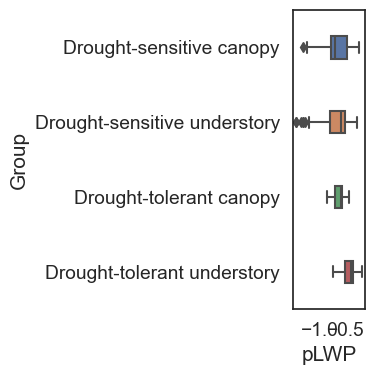

In [10]:
# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 1.25, rc = {'figure.figsize':(4, 4)})

# Change seaborn plot theme to white
sns.set_style("white")

# Box plot
Group_Box = sns.boxplot(data = data, x = "pLWP", y = "Group", width = 0.3)

# Tweak the visual presentation
Group_Box.set(ylabel = "Group")

# Tight margins
plt.tight_layout()

# Show plot
plt.show()

## Categorical Target Variables: Numerical Variable of Interest:

Formula: Group (categorical) ~ pLWP (numerical)

In [11]:
# Grouped describe by one column, stacked 
Groups = data.groupby('Group').describe().unstack(1)

# Print all rows
print(Groups.to_string())

                       Group                       
Date            count  Drought-sensitive canopy                        147
                       Drought-sensitive understory                    147
                       Drought-tolerant canopy                         147
                       Drought-tolerant understory                     147
                mean   Drought-sensitive canopy        2019-12-16 00:00:00
                       Drought-sensitive understory    2019-12-16 00:00:00
                       Drought-tolerant canopy         2019-12-16 00:00:00
                       Drought-tolerant understory     2019-12-16 00:00:00
                min    Drought-sensitive canopy        2019-10-04 00:00:00
                       Drought-sensitive understory    2019-10-04 00:00:00
                       Drought-tolerant canopy         2019-10-04 00:00:00
                       Drought-tolerant understory     2019-10-04 00:00:00
                25%    Drought-sensitive canopy 

## Categorical Target Variables: Categorical Variable of Interest:

Formula: pLWP (numerical) ~ Group (categorical)

In [12]:
data1 = data.dropna()
Qual = stat.mean(data1.pLWP + stat.stdev(data1.pLWP))

# Create HighLWP from the age column
def HighLWP_data(data): 
  if data.pLWP >= Qual: return "Yes"
  else: return "No"

# Apply the function to data and create a dataframe
HighLWP = pd.DataFrame(data1.apply(HighLWP_data, axis = 1))

# Name new column
HighLWP.columns = ['HighLWP']

# Concatenate the two dataframes
data1 = pd.concat([data1, HighLWP], axis = 1)

# First six rows of new dataset
data1.head()

,Date,Group,SF,Normalized_TWF,pLWP,mLWP,HighLWP
0,2019-10-04,Drought-sensitive canopy,184.040975,82.243292,-0.263378,-0.679769,Yes
1,2019-10-04,Drought-sensitive understory,2.475989,1.258050,-0.299669,-0.761326,Yes
2,2019-10-04,Drought-tolerant canopy,10.598949,4.405479,-0.437556,-0.722557,No
3,2019-10-04,Drought-tolerant understory,4.399854,2.055276,-0.205224,-0.702858,Yes
4,2019-10-05,Drought-sensitive canopy,182.905444,95.865255,-0.276928,-0.708261,Yes


Now we have two categories!

Formula = Group (categorical) ~ HighLWP (categorical)

In [13]:
obs = pd.crosstab(data1.Group, data1.HighLWP)
print(obs)

HighLWP                       No  Yes
Group                                
Drought-sensitive canopy      58   11
Drought-sensitive understory  65    4
Drought-tolerant canopy       69    0
Drought-tolerant understory   49   20


In [14]:
# Chi-square test
chi2, p, dof, ex = chi2_contingency(obs, correction = False)
  
# Interpret
alpha = 0.05
  
# Print the interpretation
print('Statistic = %.3f, p = %.3f' % (chi2, p))

Statistic = 30.201, p = 0.000


In [15]:
if p > alpha:
  print('Chi-square value is not greater than critical value (fail to reject H0)')
else:
    print('Chi-square value is greater than critical value (reject H0)')

Chi-square value is greater than critical value (reject H0)


C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

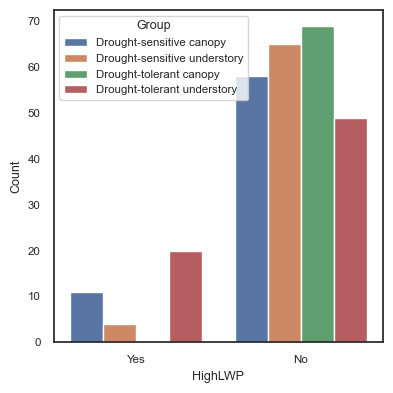

In [16]:
# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 0.75)

# Change seaborn plot theme to white
sns.set_style("white")

# Count plot of HighLWP grouped by Group 
counts = sns.countplot(data = data1, x = "HighLWP", hue = "Group")

# Tweak the visual presentation
counts.set(ylabel = "Count")

# Tight margins
plt.tight_layout()

# Show plot
plt.show()